# 如何使用python和selenium将自己收藏微博的链接导出来，并转移到自己的新号当中
## 来由
号给炸了，收藏和微博全在里面，能看，但是没法操作。WTF   
那么如何把收藏和微博导出来，搞到新的微博呢？

## 环境python3
* selenium  
这是一个自动化工具。就是可以自动模拟用户对微博的翻页、点击、滚动网页等动作

* lxml  
这是网页的解析工具。我们获取到网页之后需要通过lxml去获取网页中的链接或者文本信息。 selenium库中也有自己的网页html解析防范，但是试用过还是lxml更强大一些

安装两个库

In [ ]:
!pip install selenium
!pip install selenium

## 任务一: 把自己收藏的微博的链接link全找到

### 使用selenium登陆微博

1. 从网络上下载chromedriver.exe
2. 修改下面chrome_driver_path变量的路径为本地chromedirver.exe的路径
3. 运行下面代码会打开chrome和微博首页

In [5]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
import time
from lxml import etree
#coding:utf-8
from lxml import html 
from tqdm import tqdm
 
chrome_driver_path = r'C:\Users\xxxxx\chromedriver_win32 (1)\chromedriver.exe'
driver = webdriver.Chrome(executable_path=r"C:\Users\ESS User\Desktop\BOOK\chromedriver_win32 (1)\chromedriver.exe")
driver.get("http://www.weibo.com")

### 在调出的chrome里面，登陆自己炸号的微博，完成登陆成功

### 提取收藏微博的链接
1. 基本环境的设置  
查看自己的收藏的微博有多少页比如37页，那么设置变量 bookmark_last_page = 37     
预先设定收藏微博的链接信息放在 bookmark_total.txt 中  
提取出错的收藏夹网页信息放在 wrong_page.txt

In [6]:
bookmark_last_page = 38 
bookmark_total_path = 'bookmark_total.txt'
log_path = 'wrong_page.txt'

2. 开始运行链接提取程序

In [ ]:
open(bookmark_total_path, 'w').close()
open(log_path, 'w').close
wait_loading_time = 2   # 加载微博网页可能需要一些时间，因此等待2s中加载网页

for page in range(1, bookmark_last_page+1):
    
    driver.get(f"https://www.weibo.com/fav?page={page}") 
    time.sleep(wait_loading_time)  ##缓一定时间
    
    mark_html_path = f'mark_{page}.html'
    with  open(mark_html_path,'wb') as f:
        f.write(driver.page_source.encode('utf-8')) # 忽略非法字符   
    tree = html.parse(mark_html_path)
    
    bookmark_links = []
    page_mark_list = []
    for e in  tree.xpath("//div[@class='WB_from S_txt2']/a"):
        suffix = e.attrib['href']
        if 'collection' in suffix:
            fulllink = 'https://www.weibo.com' + suffix
            page_mark_list.append(fulllink)
 
    if len(page_mark_list) > 1:
        print('page', page,  page_mark_list[-1], 'finished')
        with open(bookmark_total_path, 'a+') as f:
            f.write(f'fav page_{page}------------------\n')
            for lk in page_mark_list:
                f.write(lk +'\n')
            f.write('\n\n')
    else:
        with open(log_path, 'a+') as f:
            print('page', page, 'failed')
            f.write(f'probmatic page {page}' + '\n' )
 

### 导出结果如下图  
bookmark_total.txt中每页收藏的对应微博链接如下展示
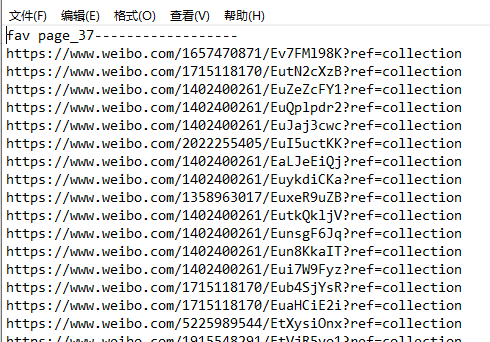

## 任务二: 访问收藏的微博链接，挨个点收藏

### 整理bookmark_total.txt中的链接，格式每行一个链接
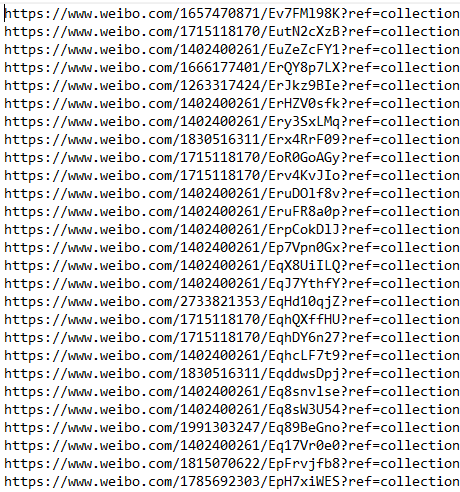

###  使用下列代码启动chrome，然后登陆自己   新号  的微博

In [12]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
import time
from lxml import etree
#coding:utf-8
from lxml import html 
from tqdm import tqdm
 
driver = webdriver.Chrome(executable_path=r"C:\Users\ESS User\Desktop\BOOK\chromedriver_win32 (1)\chromedriver.exe")
driver.get("http://www.weibo.com")

### 使用下列代码访问各个微博链接，挨个点收藏按钮

tips(看不懂可以无视，直接跑代码）  
我们下载微博是从第一页开始到第n页下载的。比如2020年的我们会先获得他的链接。  
但是收藏的时候，如果先收藏2020年，再收藏2015年的。那么最终在我们收藏夹里2020年会放到后面去了。  
因此需要对链接访问顺序做个反序。  


下面代码会从bookmark_total.txt这个文件读取link并访问。  
如果访问收藏出现了问题，那么就会放到problematic_bookmarklink.txt这个文件里

如果跑了程序遇到一些收藏失败的问题（主要是有时候页面加载不出来才导致收藏失败的）。  
可以把问题link放到bookmark_total.txt做更新，让下面程序再跑一遍

In [ ]:
with open('bookmark_total.txt', 'r') as f:
    bookmark_links = f.readlines()

bookmark_links = bookmark_links[::-1]
bookmark_links = [lk for lk in bookmark_links if len(lk) > 10]
for idx, booklink in enumerate(tqdm(bookmark_links,total=len(bookmark_links))):
    time.sleep(1)
    driver.get(booklink)
    time.sleep(1)
    try:
        save_button = driver.find_element_by_class_name('pos')
        if save_button.text != 'û已收藏':
            save_button.click()
    except:
        print('\nwrong', idx, booklink)
        with open('problematic_bookmarklink.txt', 'a+') as f:
            f.write(booklink)